In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
#sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__)))) # for scripts
sys.path.append('/Users/emilykruger/Documents/GitHub/CSH-Internship') #for local notebook
sys.path.append('../utils')
from utils.linguistic_features import remove_tags
import regex as re
from textstat import flesch_reading_ease

# Dataset Exploration

In [2]:
sample_df = pd.read_csv('../data/selected_groups_with_transcriptions.csv.gzip', compression='gzip')
pd.set_option('display.max_columns', None)
sample_df.head()

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_92086/1608947271.py:1: DtypeWarning: Columns (12,13,26,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv('../data/selected_groups_with_transcriptions.csv.gzip', compression='gzip')


,Unnamed: 0,UID_key,initial_ID,mid_message,mid_file,group_name,posting_date,message,fwd_message,fwd_posting_date_message,posting_date_file,link_url,media_file,media_file_type,fwd_posting_date_file,fwd_link_url,fwd_media_file,fwd_media_file_type,author,fwd_author,day,week,weekday,message_hash,fwd_message_hash,website,replied_to,year,month,day_of_year,duration,filepath,filename,filename_if_joined,transcribed_message,newsguard_domain,newsguard_score
0,0,209982-6408240263544091615,0,209982.0,209982.0,Helfende Q Hände 👐👏,2021-11-09 22:50:15+00:00,Oki 😃,NaN,NaN,2021-11-09 22:50:15+00:00,messages199.html#go_to_message209980,NaN,NaN,NaN,NaN,NaN,NaN,9.267455e+17,NaN,2021-11-09 12:00:00+00:00,45.0,2.0,-3.596942e+18,NaN,NaN,209980-6408240263544091615,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,209983-6408240263544091615,1,209983.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:18+00:00,Von weiblich bis männlich,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.029508e+18,NaN,2021-11-09 12:00:00+00:00,45.0,2.0,-7.438051e+18,NaN,NaN,NaN,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,209984-6408240263544091615,2,209984.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:23+00:00,Von direkt zu zurückhaltend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.029508e+18,NaN,2021-11-09 12:00:00+00:00,45.0,2.0,-5.141813e+18,NaN,NaN,NaN,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,209985-6408240263544091615,3,209985.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:28+00:00,Wie bei WOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.029508e+18,NaN,2021-11-09 12:00:00+00:00,45.0,2.0,4.179569e+18,NaN,NaN,NaN,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,209986-6408240263544091615,4,209986.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:47+00:00,Neuer Charakter und XP sammeln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.029508e+18,NaN,2021-11-09 12:00:00+00:00,45.0,2.0,3.772441e+18,NaN,NaN,NaN,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
sample_df = sample_df.drop('Unnamed: 0', axis=1)

In [4]:
sample_df.dtypes

UID_key                      object
initial_ID                    int64
mid_message                 float64
mid_file                    float64
group_name                   object
posting_date                 object
message                      object
fwd_message                 float64
fwd_posting_date_message    float64
posting_date_file            object
link_url                     object
media_file                   object
media_file_type              object
fwd_posting_date_file        object
fwd_link_url                 object
fwd_media_file               object
fwd_media_file_type          object
author                      float64
fwd_author                  float64
day                          object
week                        float64
weekday                     float64
message_hash                float64
fwd_message_hash            float64
website                      object
replied_to                   object
year                        float64
month                       

In [5]:
#checking content of some columns
sample_df[sample_df['transcribed_message'].notnull()].head(10)

,UID_key,initial_ID,mid_message,mid_file,group_name,posting_date,message,fwd_message,fwd_posting_date_message,posting_date_file,link_url,media_file,media_file_type,fwd_posting_date_file,fwd_link_url,fwd_media_file,fwd_media_file_type,author,fwd_author,day,week,weekday,message_hash,fwd_message_hash,website,replied_to,year,month,day_of_year,duration,filepath,filename,filename_if_joined,transcribed_message,newsguard_domain,newsguard_score
272,210200-6408240263544091615,272,NaN,210200.0,Helfende Q Hände 👐👏,2021-11-10 00:41:43+00:00,NaN,NaN,NaN,2021-11-10 00:41:43+00:00,NaN,voice_messages/audio_11825@10-11-2021_00-41-43...,voice message,NaN,NaN,NaN,NaN,-9.029508e+18,NaN,2021-11-10 12:00:00+00:00,45.0,3.0,NaN,NaN,NaN,NaN,2021.0,11.0,314.0,120.6265,/nas-slot4/schwurbel2/schwurbelarchiv-NPFJtWIX...,voice_messages/audio_11825@10-11-2021_00-41-43...,voice_messages/audio_11825@10-11-2021_00-41-43...,"Weißt du, das war wieder so ein klassischer F...",NaN,NaN
684,201493-6408240263544091615,684,201493.0,201493.0,Helfende Q Hände 👐👏,2021-11-03 22:15:33+00:00,Ich war sehr selten in meinem Leben so Ruhig. ...,NaN,NaN,2021-11-03 22:15:33+00:00,NaN,voice_messages/audio_11614@03-11-2021_22-15-33...,voice message,NaN,NaN,NaN,NaN,1.283475e+18,NaN,2021-11-03 12:00:00+00:00,44.0,3.0,5.042036e+18,NaN,t.me,NaN,2021.0,11.0,307.0,148.4665,/nas-slot4/schwurbel2/schwurbelarchiv-NPFJtWIX...,voice_messages/audio_11614@03-11-2021_22-15-33...,voice_messages/audio_11614@03-11-2021_22-15-33...,Guten Abend. Ich habe soeben die Voice von Ge...,NaN,NaN
890,200826-6408240263544091615,890,NaN,200826.0,Helfende Q Hände 👐👏,2021-11-03 13:07:08+00:00,NaN,NaN,NaN,2021-11-03 13:07:08+00:00,NaN,voice_messages/audio_11557@03-11-2021_13-07-08...,voice message,NaN,NaN,NaN,NaN,-1.718680e+18,NaN,2021-11-03 12:00:00+00:00,44.0,3.0,NaN,NaN,NaN,NaN,2021.0,11.0,307.0,164.4265,/nas-slot4/schwurbel2/schwurbelarchiv-NPFJtWIX...,voice_messages/audio_11557@03-11-2021_13-07-08...,voice_messages/audio_11557@03-11-2021_13-07-08...,"Ja, ich sehe das auch so. Nur was mir komisch...",NaN,NaN
891,200828-6408240263544091615,891,NaN,200828.0,Helfende Q Hände 👐👏,2021-11-03 13:10:27+00:00,NaN,NaN,NaN,2021-11-03 13:10:27+00:00,NaN,voice_messages/audio_11557@03-11-2021_13-07-08...,voice message,NaN,NaN,NaN,NaN,-1.718680e+18,NaN,2021-11-03 12:00:00+00:00,44.0,3.0,NaN,NaN,NaN,NaN,2021.0,11.0,307.0,164.4265,/nas-slot4/schwurbel2/schwurbelarchiv-NPFJtWIX...,voice_messages/audio_11557@03-11-2021_13-07-08...,voice_messages/audio_11557@03-11-2021_13-07-08...,"Ja, ich sehe das auch so. Nur was mir komisch...",NaN,NaN
911,200975-6408240263544091615,911,NaN,200975.0,Helfende Q Hände 👐👏,2021-11-03 15:51:10+00:00,NaN,NaN,NaN,2021-11-03 15:51:10+00:00,NaN,voice_messages/audio_11567@03-11-2021_15-51-10...,voice message,NaN,NaN,NaN,NaN,4.853842e+18,NaN,2021-11-03 12:00:00+00:00,44.0,3.0,NaN,NaN,NaN,NaN,2021.0,11.0,307.0,93.1465,/nas-slot4/schwurbel2/schwurbelarchiv-NPFJtWIX...,voice_messages/audio_11567@03-11-2021_15-51-10...,NaN,"Man muss versuchen sich da rauszuziehen, auch...",NaN,NaN
1980,106881-6408240263544091615,1980,NaN,106881.0,Helfende Q Hände 👐👏,2021-07-10 12:36:14+00:00,NaN,NaN,NaN,2021-07-10 12:36:14+00:00,NaN,voice_messages/audio_5321@10-07-2021_12-36-14.ogg,voice message,NaN,NaN,NaN,NaN,1.915898e+18,NaN,2021-07-10 12:00:00+00:00,27.0,6.0,NaN,NaN,NaN,NaN,2021.0,7.0,191.0,104.3065,/nas-slot4/schwurbel2/schwurbelarchiv-NPFJtWIX...,voice_messages/audio_5321@10-07-2021_12-36-14.ogg,NaN,Also erstmal nervste mich überhaupt nicht. Ic...,NaN,NaN
1989,106916-6408240263544091615,1989,NaN,106916.0,Helfende Q Hände 👐👏,2021-07-10 12:48:47+00:00,NaN,NaN,NaN,2021-07-10 12:48:47+00:00,NaN,voice_messages/audio_5327@10-07-2021_12-48-47.ogg,voice message,NaN,NaN,NaN,NaN,-7.575311e+18,NaN,2021-07-10 12:00:00+00:00,27.0,6.0,NaN,NaN,NaN,NaN,2021.0,7.0,191.0,78.7465,/nas-slot4/schwurbel2/schwurbelarchiv-NPFJtWIX...,voice_messages/audio_5327@10-07-2021_12-48-47.ogg,voice_messages/audio_5327@10-07-2021_12-48-47.ogg,"Guck mal,

In [6]:
#look at transcribed messages
def insert_line_breaks(text, n=100):
    """Inserts a line break every n characters in the text."""
    return '\n'.join(text[i:i+n] for i in range(0, len(text), n))

transcriptions = sample_df[sample_df['transcribed_message'].notnull()].head(10)

for index, row in transcriptions.iterrows():
    adjusted_text = insert_line_breaks(row['transcribed_message'], 100)
    print(f"Entry {index+1}:")
    print(adjusted_text)
    print("\n" + "-"*50 + "\n")

Entry 273:
 Weißt du, das war wieder so ein klassischer Fall von, sie hat einfach keine Ahnung, was sie da gesa
gt hat. Sie hat damit, indem sie mir Unsicherheiten projiziert, da hat sie im Prinzip ganz offen mei
ner freundens Gesicht gespuckt. Weil, für Unsicherheiten ist sie da. Sie ist dafür da, mir zu sagen,
 wenn ich Dinge falsch mache. Und nicht irgendeine Bianca, die in meiner Gruppe ist und gegensätzlic
h für mich spricht. Also, eine Frechheit einfach. Die Leute sind sich gar nicht bewusst, was sie da 
sagen und wundern sich, wenn man dann angepisst ist. Weil sie einfach nur irgendwas blubbern. Und da
s ist bei Frauen nämlich das Problem, wenn sie, denn sie war halt auch, ist halt auch nicht offen, a
ber sie hat auch in diesem, dieses New Age-Dick, dieses Rumtransit, die in diesem Bullshit, hat sie 
auch noch mit drin. Und du siehst, ach man, ich hab's schon mal vergessen, was ich sagen wollte. Da 
finden wir einfach die Worte. Ach genau, ja genau, ja genau. Und die sind dann s

In [7]:
messages = sample_df[sample_df['message'].notnull()].head(50)

for index, row in messages.iterrows():
    adjusted_text = insert_line_breaks(row['message'], 100)
    print(f"Entry {index+1}:")
    print(adjusted_text)
    print("\n" + "-"*50 + "\n")

Entry 1:
Oki 😃       

--------------------------------------------------

Entry 2:
Von weiblich bis männlich       

--------------------------------------------------

Entry 3:
Von direkt zu zurückhaltend       

--------------------------------------------------

Entry 4:
Wie bei WOW       

--------------------------------------------------

Entry 5:
Neuer Charakter und XP sammeln       

--------------------------------------------------

Entry 6:
"Der kleine Nerd" oder "mr scheisse einfach" Ist mein Hauptcharakter. Quasi ich selbst. Ein Spielkin
d. Kleiner Bro für jeden.       

--------------------------------------------------

Entry 7:
In diesem Sinne....🤗 haltet die Ohren steif, Augen zu und durch!🙈😅❤  <a href="t.me/LichtseelenKanal"
>t.me/LichtseelenKanal</a>

--------------------------------------------------

Entry 8:
Quasi wie Mr Jackel und Doktor Hide 🤔🤔🤔😂😂😂😂😂😂       

--------------------------------------------------

Entry 9:
Jetzt der Böse part 😂😂😂       

----------

# Model Exploration

In [8]:
#get sample of sample_df
filtered_df = sample_df[sample_df['message'].notna()]
sampled_df = filtered_df.sample(n=150, replace=True if len(filtered_df) < 150 else False)

sample = sampled_df[['message']]
sample.head()


#set options to display all rows of df
pd.set_option('display.max_rows', None)

## Complexity/ Readability

### TextStat for Flesch Readability

In [9]:
import textstat

textstat.set_lang('de')
flesch_scores = []

for message in sample['message']:
    score = textstat.flesch_reading_ease(message)
    flesch_scores.append(score)
sample['flesch_reading_ease'] = flesch_scores

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_92086/1452775700.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['flesch_reading_ease'] = flesch_scores


In [10]:
sample

,message,flesch_reading_ease
2563896,Einen Strafantrag in der jüdischen FiIrma BRD ...,45.85
2194250,"An uns soll es nicht liegen ... <a href=""https...",-56.16
3183702,Das ist aber früh....also für Ferienzeiten,60.00
3084566,👍👍👍,180.00
2213240,Weiter links,90.25
2110224,Allerdings...,3.50
3152003,Es darf nicht nur in Berlin krachen. Sie sollt...,90.60
3896307,Anguis fragilis vielleicht?,42.45
1608914,wichtig gesunde ernährung aber eines kann ich ...,54.70
2626541,"Kontodaten wüsste ich nicht, via Paypal ist es...",79.25


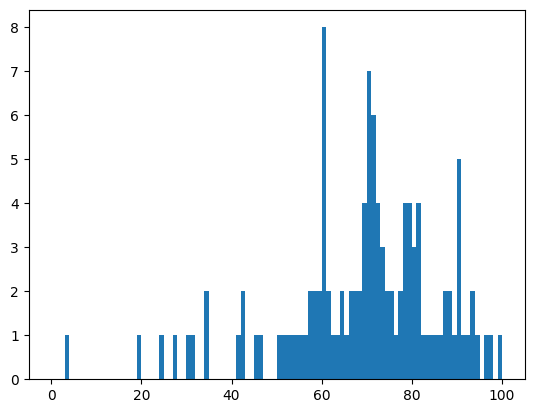

In [11]:
# plot histogram of scores between 0 and 100
plt.hist(sample['flesch_reading_ease'], bins=100, range=(0, 100));

In [12]:
sample[sample['flesch_reading_ease'] >100]

,message,flesch_reading_ease
3084566,👍👍👍,180.00
2267541,Was zum ....,119.50
2163741,oder einen Kaffee to go (bzw. to storm) und da...,109.15
3271840,und mit dem Fernglas auch noch nicht 😉,108.65
1316547,👍🏻🇺🇸🇺🇸🇺🇸 🇷🇺🇷🇺🇷🇺,180.00
3180899,Da tun mir die Tiere leid,103.80
662761,👍,180.00
348671,Gern,120.50
3936228,Nein eher nicht,118.50
1319220,🤣🤣🤣,180.00


### Hugging Face: krupper/text-complexity-classification

In [13]:
from transformers import pipeline
classifier = pipeline(model="krupper/text-complexity-classification")

/Users/emilykruger/Documents/GitHub/CSH-Internship/csh_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
complex_label = []

for message in sample['message']:
    try:
        result = classifier(message)
        complex_label.append(result[0]['label'])
    except:
        complex_label.append('error')
sample['complexity_krupper'] = complex_label

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_92086/1101831005.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['complexity_krupper'] = complex_label


In [15]:
classifier("Das ist ein einfacher Satz.")
#extract label from output
result = classifier("Das ist ein einfacher Satz.")
result[0]['label']

'everyday_language'

In [16]:
for message in sample[sample['complexity_krupper'] != 'everyday_language']['message']:
    print(message + "\n")

wichtig gesunde ernährung aber eines kann ich sehr empfehlen uns das ist frisches sauerkraut (also nicht pasteurisiert) Die Milchsäurebakterien bilden mit dem Tumor ein Racemat dass als Energie der Leber zugeführt wird. Damit wird der Tumor mit der Zeit kleiner       

Meine Pflege Schwester       

Es ist aber ein modifizierter Adenovirus das Gen basiert ist, hat mit dem Orginalen nichts so wirklich zu tun 😉. Aber trotzdem ist es kein klassischer Vektortotenimpfstoff, sonder eher eine Gen-Therapie       

Wer weiß, vielleicht werden wir bereits von Quanten Ki s manipuliert und gesteuert🤔       

🙏🙏🙏🙏Die Zeit ist gekommen, wo all der Schmerz vorbei ist. 🙏🙏🙏🙏🥰🥰🥰🥰       

Raaatet mal wer diese Song sehr gerne mag.🥳🥳🥳❤️       

Und der Rest ist außer sich, weil sie es nicht glauben können, dass andere es geglaubt haben       

INNER EARTH != HOLLOW EARTH  INNERE ERDE! = HOHLE ERDE       

Ja so konnte ich das auch immer lesen. Ohne Namen etc. Ok. Hätte ja sein können das Du schon mehr wei

### Hugging Face: MiriUll/distilbert-german-text-complexity

## Sentiment

### HuggingFace: aari1995/German_Sentiment

In [17]:
sentiment_model = pipeline(model="aari1995/German_Sentiment")

In [18]:
sentiment_label = []
for message in sample['message']:
    try:
        result = sentiment_model(message)
        sentiment_label.append(result[0]['label'])
    except:
        sentiment_label.append('error')

sample['sentiment_aari'] = sentiment_label

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_92086/3735395712.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['sentiment_aari'] = sentiment_label


In [19]:
sample

,message,flesch_reading_ease,complexity_krupper,sentiment_aari
2563896,Einen Strafantrag in der jüdischen FiIrma BRD ...,45.85,everyday_language,neutral
2194250,"An uns soll es nicht liegen ... <a href=""https...",-56.16,everyday_language,neutral
3183702,Das ist aber früh....also für Ferienzeiten,60.00,everyday_language,positive
3084566,👍👍👍,180.00,everyday_language,negative
2213240,Weiter links,90.25,everyday_language,neutral
2110224,Allerdings...,3.50,everyday_language,negative
3152003,Es darf nicht nur in Berlin krachen. Sie sollt...,90.60,everyday_language,negative
3896307,Anguis fragilis vielleicht?,42.45,everyday_language,positive
1608914,wichtig gesunde ernährung aber eines kann ich ...,54.70,plain_language,neutral
2626541,"Kontodaten wüsste ich nicht, via Paypal ist es...",79.25,everyday_language,positive


In [20]:
#for the first 10 rows, print message and sentiment
for index, row in sample.head(10).iterrows():
    print(f"Message: {row['message']}")
    print(f"Sentiment: {row['sentiment_aari']}")
    print("\n" + "-"*50 + "\n")

Message: Einen Strafantrag in der jüdischen FiIrma BRD und damit an einen jüdischen Firmengerichte zu stellen - was soll dabei raus kommen in der Firmendiktatur !?       
Sentiment: neutral

--------------------------------------------------

Message: An uns soll es nicht liegen ... <a href="https://www.bundesstaat-deutschland.de/tdr.html">https://www.bundesstaat-deutschland.de/tdr.html</a> ...       
Sentiment: neutral

--------------------------------------------------

Message: Das ist aber früh....also für Ferienzeiten       
Sentiment: positive

--------------------------------------------------

Message: 👍👍👍       
Sentiment: negative

--------------------------------------------------

Message: Weiter links       
Sentiment: neutral

--------------------------------------------------

Message: Allerdings...       
Sentiment: negative

--------------------------------------------------

Message: Es darf nicht nur in Berlin krachen. Sie sollten nicht mehr wissen wohin sie müssen  

### Hugging Face: oliverguhr/german-sentiment-bert

In [21]:
from germansentiment import SentimentModel

model = SentimentModel()

In [22]:
sentiment_label_bert = []

for message in sample['message']:
    try:
        result = model.predict_sentiment(message)
        sentiment_label_bert.append(result)
    except:
        sentiment_label_bert.append('error')

sample['sentiment_bert'] = sentiment_label_bert

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_92086/3612617335.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['sentiment_bert'] = sentiment_label_bert


In [23]:
sample

,message,flesch_reading_ease,complexity_krupper,sentiment_aari,sentiment_bert
2563896,Einen Strafantrag in der jüdischen FiIrma BRD ...,45.85,everyday_language,neutral,"[negative, positive, positive, negative, posit..."
2194250,"An uns soll es nicht liegen ... <a href=""https...",-56.16,everyday_language,neutral,"[positive, positive, negative, positive, posit..."
3183702,Das ist aber früh....also für Ferienzeiten,60.00,everyday_language,positive,"[negative, positive, negative, negative, posit..."
3084566,👍👍👍,180.00,everyday_language,negative,"[negative, negative, negative, negative, negat..."
2213240,Weiter links,90.25,everyday_language,neutral,"[positive, negative, positive, positive, negat..."
2110224,Allerdings...,3.50,everyday_language,negative,"[positive, negative, negative, negative, negat..."
3152003,Es darf nicht nur in Berlin krachen. Sie sollt...,90.60,everyday_language,negative,"[negative, negative, negative, negative, posit..."
3896307,Anguis fragilis vielleicht?,42.45,everyday_language,positive,"[positive, positive, positive, positive, posit..."
1608914,wichtig gesunde ernährung aber eines kann ich ...,54.70,plain_language,neutral,"[positive, positive, positive, negative, posit..."
2626541,"Kontodaten wüsste ich nicht, via Paypal ist es...",79.25,everyday_language,positive,"[negative, positive, positive, positive, posit..."


### HuggingFace: ssary/XLM-RoBERTa-German-sentiment

In [24]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

model = AutoModelForSequenceClassification.from_pretrained('ssary/XLM-RoBERTa-German-sentiment')

In [25]:
tokenizer = AutoTokenizer.from_pretrained('ssary/XLM-RoBERTa-German-sentiment')

/Users/emilykruger/Documents/GitHub/CSH-Internship/csh_venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [28]:
predicted_classes = []
for message in sample['message']:
    inputs = tokenizer(message, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_classes = ['negative', 'neutral', 'positive']
    predicted_class_idx = torch.argmax(predictions).item()
    predicted_class = sentiment_classes[predicted_class_idx]
    predicted_classes.append(predicted_class)

sample['sentiment_roberta'] = predicted_classes

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_92086/2331511298.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['sentiment_roberta'] = predicted_classes


In [30]:
sample

,message,flesch_reading_ease,complexity_krupper,sentiment_aari,sentiment_bert,sentiment_roberta
2563896,Einen Strafantrag in der jüdischen FiIrma BRD ...,45.85,everyday_language,neutral,"[negative, positive, positive, negative, posit...",neutral
2194250,"An uns soll es nicht liegen ... <a href=""https...",-56.16,everyday_language,neutral,"[positive, positive, negative, positive, posit...",negative
3183702,Das ist aber früh....also für Ferienzeiten,60.00,everyday_language,positive,"[negative, positive, negative, negative, posit...",negative
3084566,👍👍👍,180.00,everyday_language,negative,"[negative, negative, negative, negative, negat...",positive
2213240,Weiter links,90.25,everyday_language,neutral,"[positive, negative, positive, positive, negat...",positive
2110224,Allerdings...,3.50,everyday_language,negative,"[positive, negative, negative, negative, negat...",negative
3152003,Es darf nicht nur in Berlin krachen. Sie sollt...,90.60,everyday_language,negative,"[negative, negative, negative, negative, posit...",negative
3896307,Anguis fragilis vielleicht?,42.45,everyday_language,positive,"[positive, positive, positive, positive, posit...",neutral
1608914,wichtig gesunde ernährung aber eines kann ich ...,54.70,plain_language,neutral,"[positive, positive, positive, negative, posit...",positive
2626541,"Kontodaten wüsste ich nicht, via Paypal ist es...",79.25,everyday_language,positive,"[negative, positive, positive, positive, posit...",negative


In [32]:
differences = sample[sample['sentiment_aari'] != sample['sentiment_roberta']]
#print messages where the two models disagree plus each of the models' predictions
for index, row in differences.iterrows():
    print(f"Message: {row['message']}")
    print(f"Sentiment Aari: {row['sentiment_aari']}")
    print(f"Sentiment Roberta: {row['sentiment_roberta']}")
    print("\n" + "-"*50 + "\n")

Message: An uns soll es nicht liegen ... <a href="https://www.bundesstaat-deutschland.de/tdr.html">https://www.bundesstaat-deutschland.de/tdr.html</a> ...       
Sentiment Aari: neutral
Sentiment Roberta: negative

--------------------------------------------------

Message: Das ist aber früh....also für Ferienzeiten       
Sentiment Aari: positive
Sentiment Roberta: negative

--------------------------------------------------

Message: 👍👍👍       
Sentiment Aari: negative
Sentiment Roberta: positive

--------------------------------------------------

Message: Weiter links       
Sentiment Aari: neutral
Sentiment Roberta: positive

--------------------------------------------------

Message: Anguis fragilis vielleicht?       
Sentiment Aari: positive
Sentiment Roberta: neutral

--------------------------------------------------

Message: wichtig gesunde ernährung aber eines kann ich sehr empfehlen uns das ist frisches sauerkraut (also nicht pasteurisiert) Die Milchsäurebakterien bilden

# Exploration of Computed Count-Based Features

In [4]:
data = pd.read_csv('../data/results/messages_with_features_200000.csv.gzip', compression='gzip').drop('Unnamed: 0', axis=1)
data['final_message_string'] = data['final_message_string'].astype(str)

In [5]:
data.head(10)

,UID_key,group_or_channel,final_message,final_message_string,preprocessed_message,sent_count,word_count,avg_sent_length,avg_word_length,exclamation_count,question_count,emoji_count,noun_count,verb_count,adj_count,flesch_reading_ease,flesch_reading_ease_class
0,5216248197782804714237638,group,👍🏼,,,1,0,0.000000,0.000000,0,0,1,0,0,0,NaN,unclassified
1,3325378587905794225980510,group,Die Reptiloiden leiten immer wieder Warmphasen...,Die Reptiloiden leiten immer wieder Warmphasen...,reptiloide leiten warmphasen beschießen Sonne ...,2,19,9.500000,6.684211,0,0,0,5,2,1,26.45,very confusing
2,2255608197782804714237638,group,"Oh mein Gott... ERSTENS :""Sidney Powell WAR ei...","Oh mein Gott... ERSTENS :""Sidney Powell WAR ei...",oh Gott erstens Sidney Powell einst Bundesanwä...,11,82,7.454545,6.414634,5,0,0,13,7,2,57.15,fairly difficult
3,457113756755399766928245,group,Teilweise. Biebel Zitate aus dem Zusammenhang ...,Teilweise. Biebel Zitate aus dem Zusammenhang ...,teilweise Biebel Zitat Zusammenhang Denkanstöß...,5,31,6.200000,5.516129,0,0,0,5,3,1,70.25,fairly easy
4,6739-6408240263544091615,group,wie bitte ? ich beantworte das problem dieser ...,wie bitte ? ich beantworte das problem dieser ...,bitte beantworten Problem sterblichen 3 Wörter...,4,25,6.250000,5.720000,0,1,0,7,4,0,62.20,standard
5,35304118200335715773759193,group,"Meine Meinung: STIKO, RKI und Politik-ALLE Pa...","Meine Meinung: STIKO, RKI und Politik-ALLE Pa...",Meinung Stiko rki politik-alle parteien- gle...,17,157,9.235294,6.140127,8,0,6,40,17,12,49.00,difficult
6,1394-9201162816715117198,group,Kann jemand helfen?,Kann jemand helfen?,helfen,2,3,1.500000,5.666667,0,1,0,0,1,0,77.55,fairly easy
7,2224358197782804714237638,group,Seit März immer nur gelaber! Das ist so lächer...,Seit März immer nur gelaber! Das ist so lächer...,März Gelaber lächerlich rein interpretieren bi...,4,40,10.000000,4.675000,3,0,0,3,3,0,79.25,fairly easy
8,408838-2216795262304420685,group,Wohin?? (emigrieren),Wohin?? (emigrieren),wohin emigrieren,2,2,1.000000,9.500000,0,1,0,0,1,0,31.75,difficult
9,181441-6408240263544091615,group,Packungsbeilage .... Muss mein UFO tanken...,Packungsbeilage .... Muss mein UFO tanken...,Packungsbeilage Ufo tanken,2,5,2.500000,7.200000,0,0,0,1,1,0,58.00,fairly difficult


In [6]:
cols = list(data.columns)[5:]
cols

['sent_count',
 'word_count',
 'avg_sent_length',
 'avg_word_length',
 'exclamation_count',
 'question_count',
 'emoji_count',
 'noun_count',
 'verb_count',
 'adj_count',
 'flesch_reading_ease',
 'flesch_reading_ease_class']

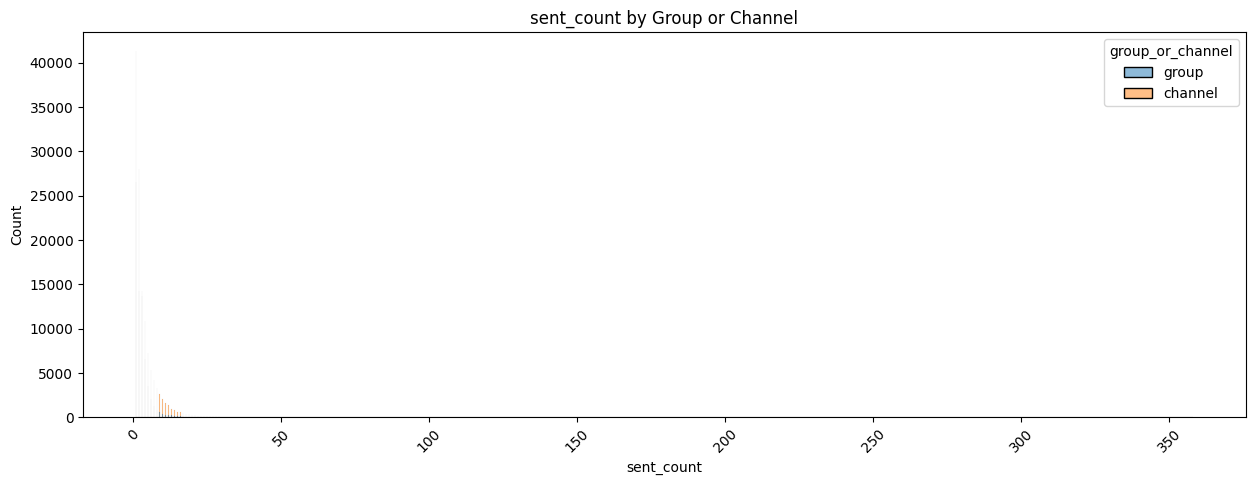

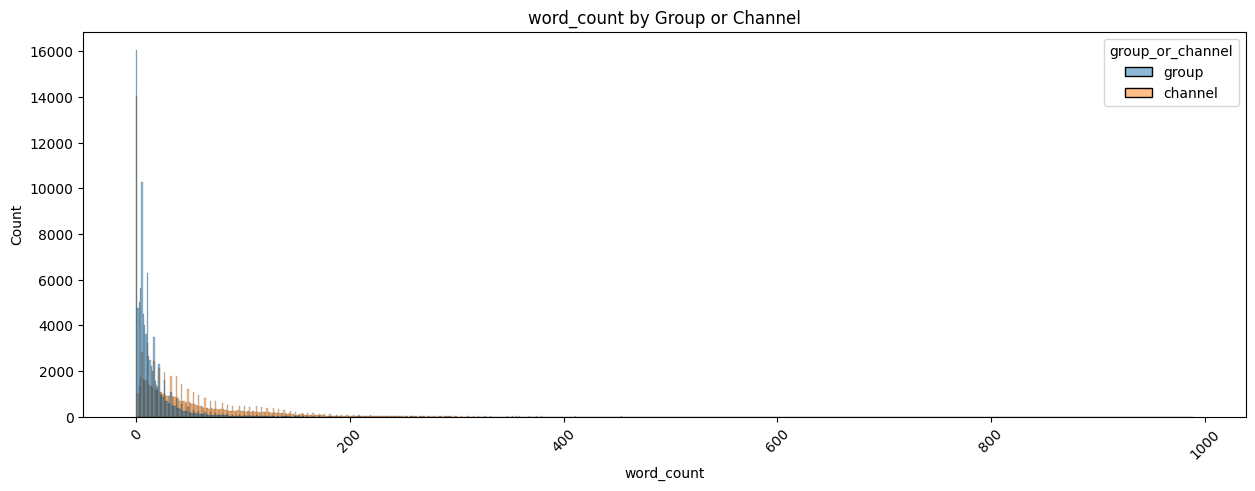

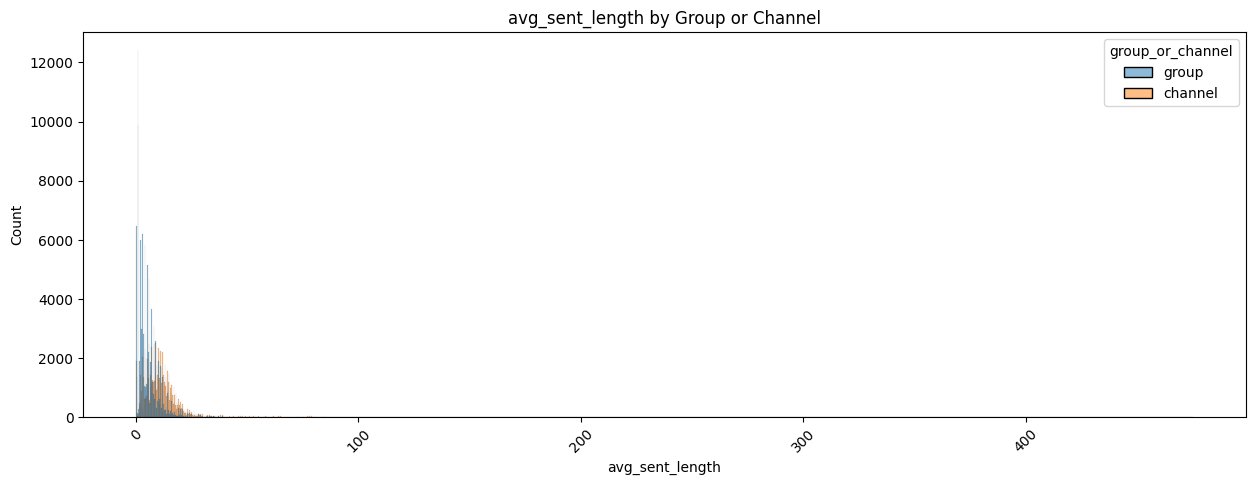

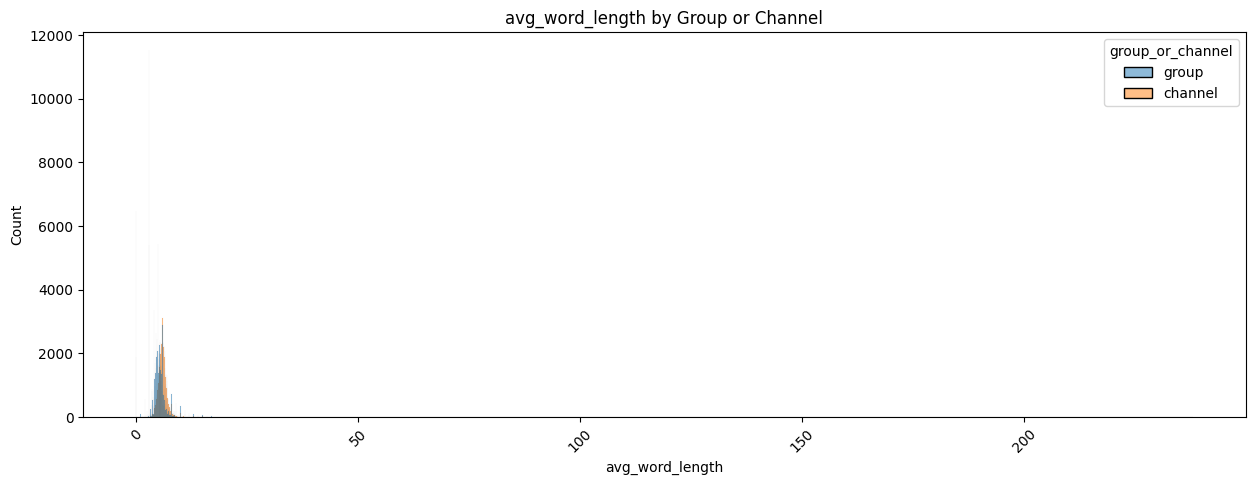

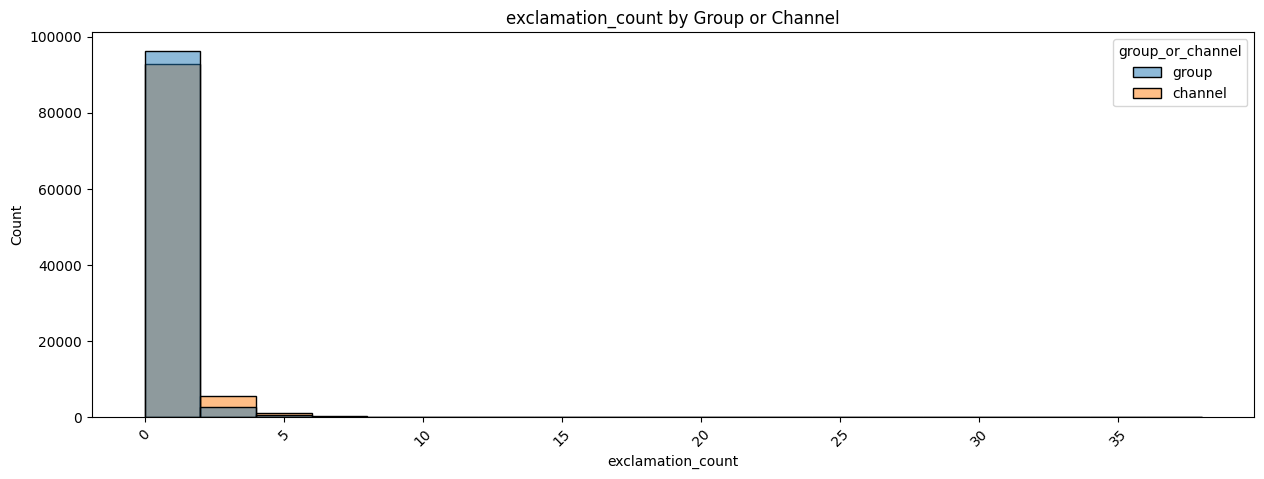

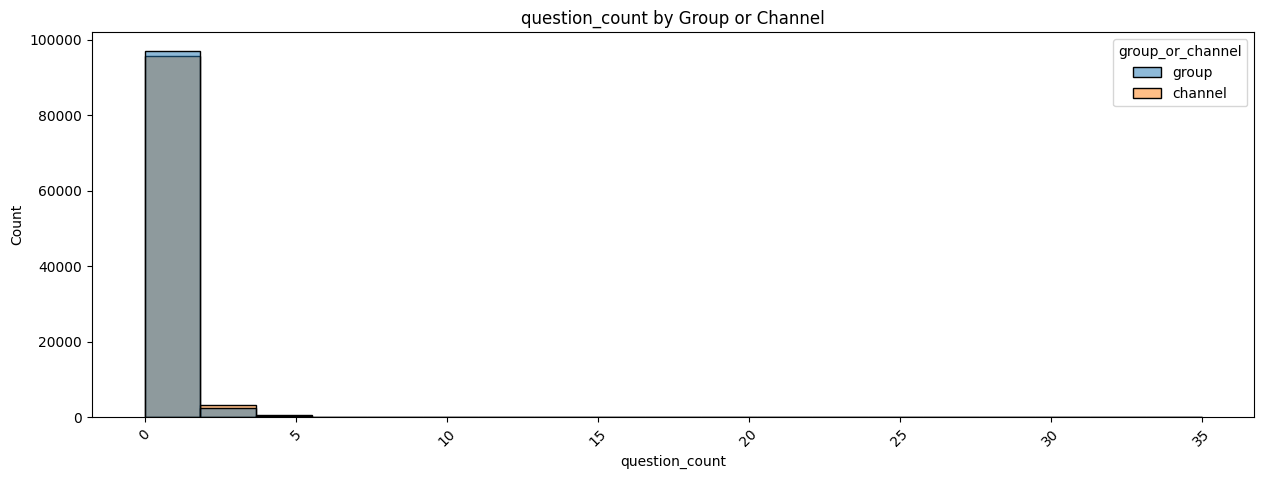

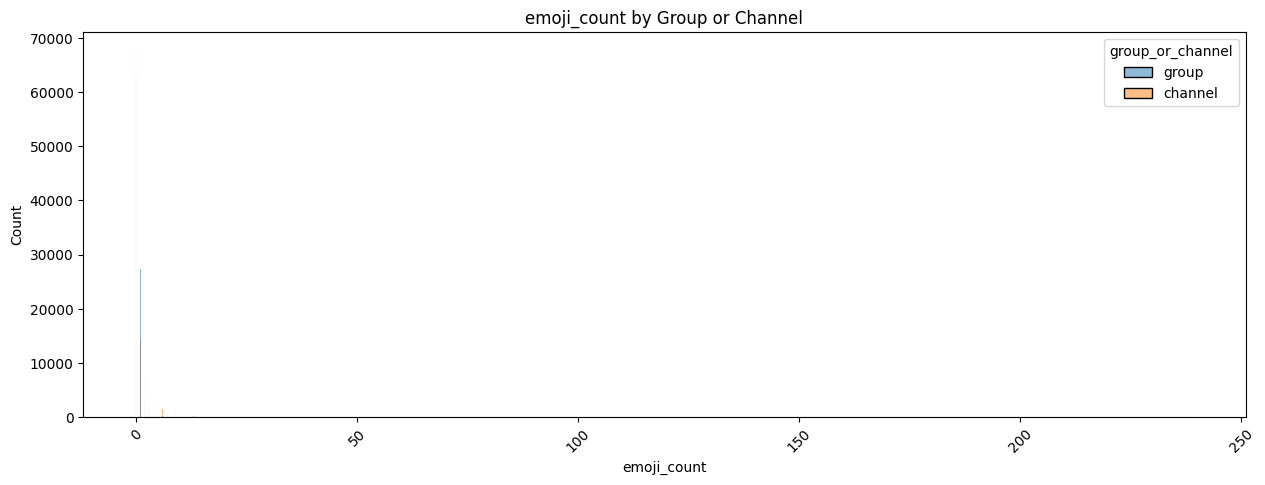

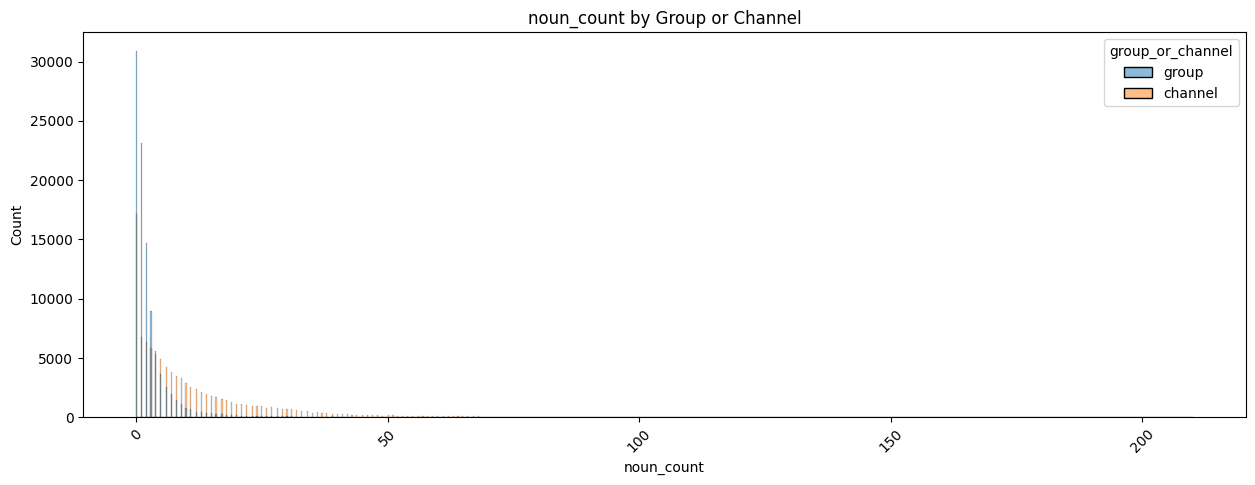

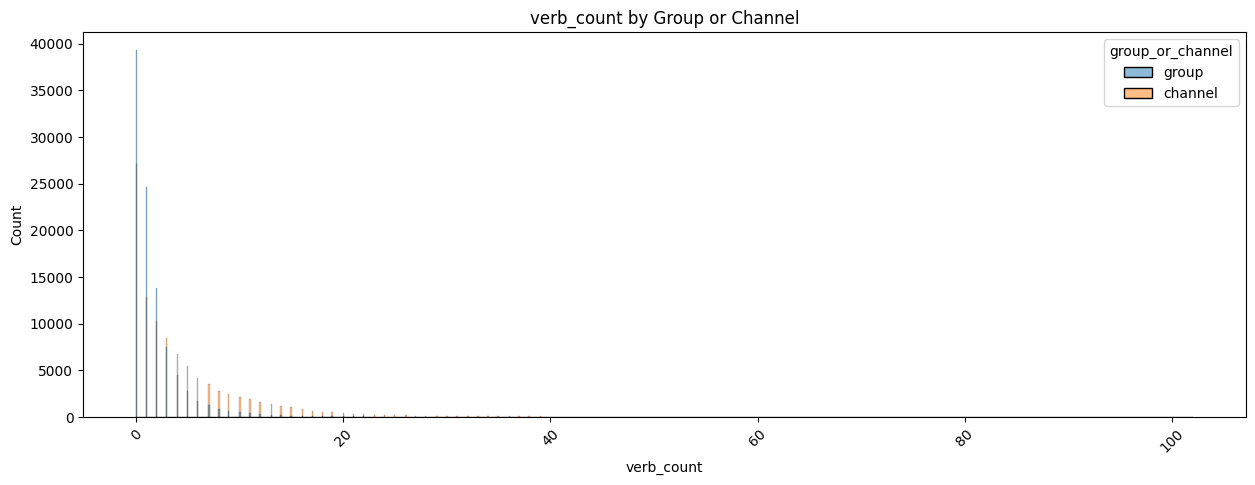

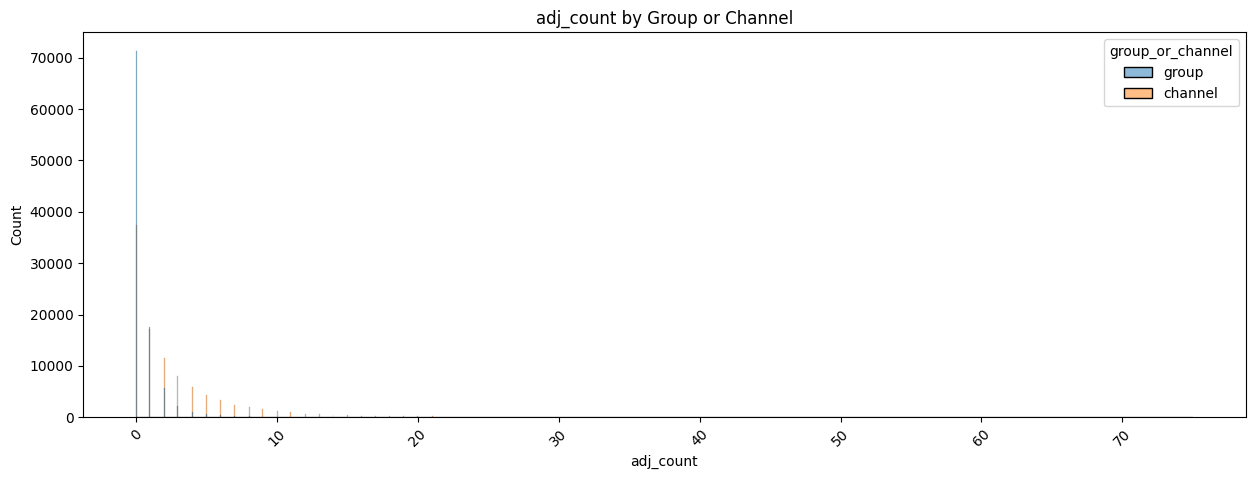

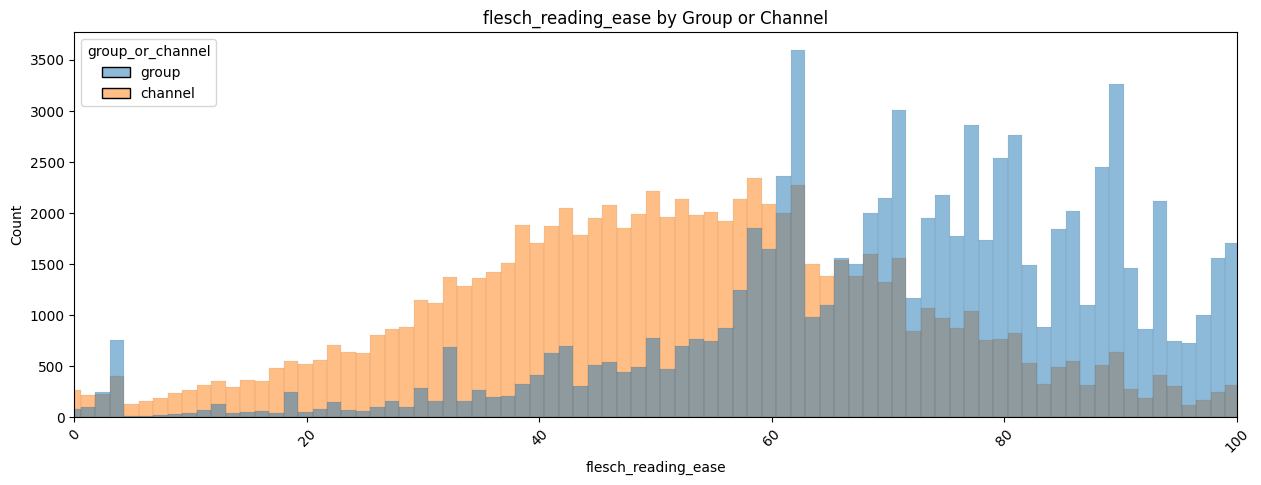

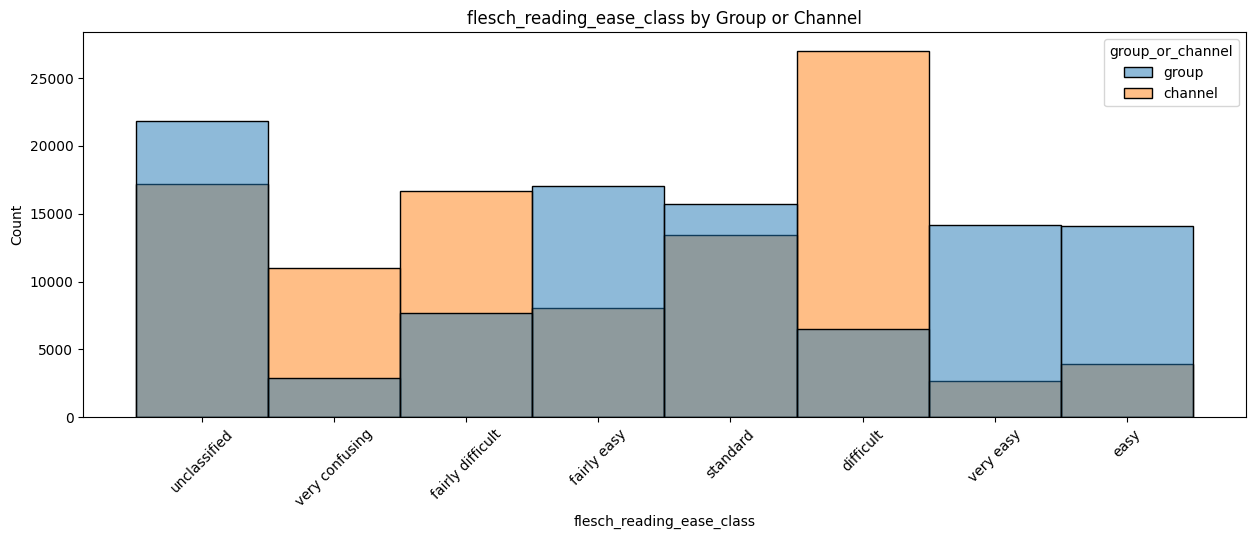

In [7]:
for col in cols:
    plt.figure(figsize=(15, 5))
    sns.histplot(data=data, x = col, hue='group_or_channel')
    plt.xticks(rotation=45)
    plt.title(f'{col} by Group or Channel')
    if col == 'flesch_reading_ease':
        plt.xlim(0,100)
    plt.show()

In [8]:
#create sample where flesch reading ease is less than 0 or greater than 100
flesch_scores = data[data['flesch_reading_ease_class'] == 'unclassified']


for message in flesch_scores['final_message_string'][:50]:
    print(message + '\n' + '---' *50)

       
------------------------------------------------------------------------------------------------------------------------------------------------------
       
------------------------------------------------------------------------------------------------------------------------------------------------------
       
------------------------------------------------------------------------------------------------------------------------------------------------------
Los        
------------------------------------------------------------------------------------------------------------------------------------------------------
nan
------------------------------------------------------------------------------------------------------------------------------------------------------
Nein.       
------------------------------------------------------------------------------------------------------------------------------------------------------
Ali        
-----------------------------